K means clustering is an unsupervised data analysis technique that organizes data objects by its proximity based on its variables. It helps create a natural grouping for a set of data objects. By grouping data, one can understand how each data point relates to each other and discover groups of similar ones. 

When groups are formed, centroids can be defined for them. The ideal data object minimizes the sum of the distance to each of the data points in a cluster. By analyzing these centroid variables, we will be able to define each cluster in terms of its characteristics. 

K means clustering divides a set of data in "k" clusters, hence the name. Each observation to a cluster is minimized to the cluster's mean. 

## About the dataset:

Dataset can be found at: http://www.gapminder.org/data/

This dataset is about the deaths from infectious Tuberculosis in each country from 1990 to 2007. 

## Steps:

1) Start with a randomly selected set of k centroids

2) Determine which observation is in which cluster (based on which centroid it is closest to...using the euclidean distance). 

3) Recalculate the centroids of each cluster by minimizing the squared euclidean distance to each observation in the cluster. 

4) Repeat 2 and 3 until the members of the clusters no longer change. 

We're going to use sklearn


In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *

%matplotlib inline

In [30]:
df = pd.read_csv("datasets/tb_deaths_per_100k.csv", index_col = 0, thousands = ",")

In [31]:
df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 19
"TB mortality, all forms (per 100 000 population per year)",,,,,,,,,,,,,,,,,,,
Afghanistan,50.0,49.0,48.0,47.0,47.0,46.0,46.0,45.0,43.0,43.0,41.0,39.0,36.0,37.0,34.0,33.0,31.0,30.0,NaN
Albania,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN
Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
American Samoa,5.0,2.0,0.0,2.0,2.0,2.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN
Andorra,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN


Clean up the data a bit

In [32]:
tb = df.copy()

In [33]:
tb.index.names = ["Country"]
tb.columns.names = ["Year"]
tb.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 19
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,50.0,49.0,48.0,47.0,47.0,46.0,46.0,45.0,43.0,43.0,41.0,39.0,36.0,37.0,34.0,33.0,31.0,30.0,NaN
Albania,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN
Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
American Samoa,5.0,2.0,0.0,2.0,2.0,2.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN
Andorra,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN


In [34]:
tb.tail()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 19
Country,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,NaN
Yemen,18.0,17.0,18.0,17.0,17.0,16.0,16.0,15.0,14.0,13.0,12.0,12.0,12.0,11.0,11.0,10.0,10.0,10.0,NaN
Zambia,126.0,153.0,182.0,203.0,218.0,229.0,238.0,247.0,250.0,258.0,255.0,274.0,156.0,138.0,137.0,138.0,128.0,115.0,NaN
Zimbabwe,140.0,161.0,176.0,193.0,208.0,225.0,239.0,253.0,141.0,155.0,185.0,197.0,216.0,253.0,253.0,263.0,268.0,265.0,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm going to remove that last row of NaNs.

In [35]:
tb = tb[:-1]
tb.tail()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 19
Country,,,,,,,,,,,,,,,,,,,
Wallis et Futuna,15.0,40.0,7.0,19.0,19.0,10.0,10.0,12.0,10.0,10.0,11.0,2.0,28.0,12.0,5.0,4.0,7.0,3.0,NaN
West Bank and Gaza,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,NaN
Yemen,18.0,17.0,18.0,17.0,17.0,16.0,16.0,15.0,14.0,13.0,12.0,12.0,12.0,11.0,11.0,10.0,10.0,10.0,NaN
Zambia,126.0,153.0,182.0,203.0,218.0,229.0,238.0,247.0,250.0,258.0,255.0,274.0,156.0,138.0,137.0,138.0,128.0,115.0,NaN
Zimbabwe,140.0,161.0,176.0,193.0,208.0,225.0,239.0,253.0,141.0,155.0,185.0,197.0,216.0,253.0,253.0,263.0,268.0,265.0,NaN


I'll also remove that last column of NaNs

In [36]:
del tb["Unnamed: 19"]
tb.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,50.0,49.0,48.0,47.0,47.0,46.0,46.0,45.0,43.0,43.0,41.0,39.0,36.0,37.0,34.0,33.0,31.0,30.0
Albania,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
American Samoa,5.0,2.0,0.0,2.0,2.0,2.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Andorra,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0


Looking much better now...

Kmeans clustering takes the set of data points and clusters them in specified number of groups. We have 18 variables here so let's use PCA to reduce the dimensions a bit. For large dimensional data, normal PCA implementation may not work. Consider using Spark's dimensionality reduction features. 

Specify the number of principal components that we want to use then call fit() on tb.

In [37]:
pca = PCA(n_components = 2) # specify 2 principal componenets. 

In [38]:
pca.fit(tb)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca_fitted = pca.transform(tb)
pcaDf = pd.DataFrame(pca_fitted)
pcaDf.head()

,0,1
0,51.817943,-41.930763
1,-99.541156,8.694757
2,-108.470846,11.361761
3,-110.172725,8.275184
4,-105.472595,8.233806


Now we have the 2 principal componenets generated. Let's assign the indices of "tb"

In [40]:
pcaDf.index = tb.index

In [41]:
pcaDf.head(5)

,0,1
Country,,
Afghanistan,51.817943,-41.930763
Albania,-99.541156,8.694757
Algeria,-108.470846,11.361761
American Samoa,-110.172725,8.275184
Andorra,-105.472595,8.233806


Let's also rename the columns

In [42]:
pcaDf.columns = ["PC1", "PC2"]
pcaDf.head()

,PC1,PC2
Country,,
Afghanistan,51.817943,-41.930763
Albania,-99.541156,8.694757
Algeria,-108.470846,11.361761
American Samoa,-110.172725,8.275184
Andorra,-105.472595,8.233806


Let's look at the explained variance ratio by each PC

In [43]:
print(pca.explained_variance_ratio_)

[ 0.90647563  0.05727867]


The 1st principal component explains over 90% of the variance. The 2nd principal component accounts for nearly 6%. Total of almost 96% of variance in the dataset. Now that we have a lower dimensionality version of the dataset, let's call the plot function on the dataframe. 

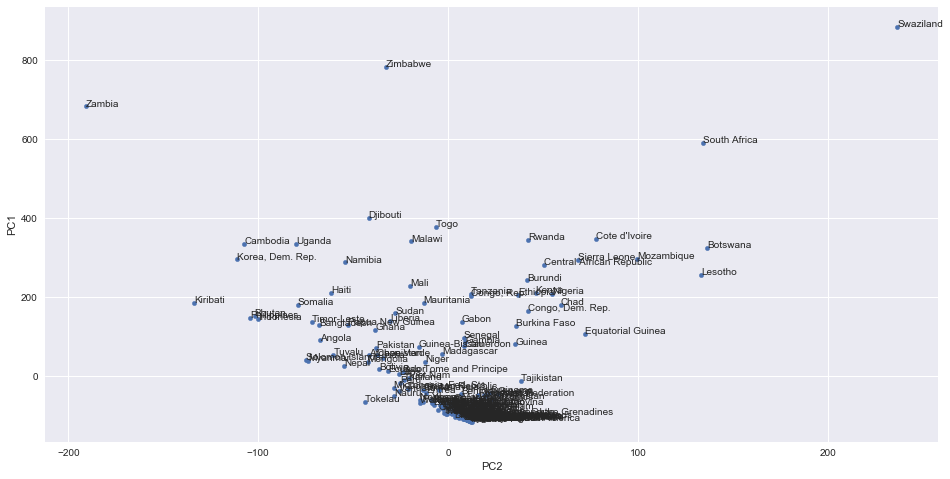

In [44]:
ax = pcaDf.plot(kind = "scatter", x = "PC2", y = "PC1", figsize = (16, 8))

for i, country in enumerate(pcaDf.index):
    ax.annotate(country, (pcaDf.iloc[i].PC2, pcaDf.iloc[i].PC1))

Let's create a bubble chart by setting the point size to a value proportional to the mean value of all the years in that particular country. Let's create a new column containing the re-scaled mean per country across all the years. 

In [45]:
pcaDf["CountryMean"] = pd.Series(tb.mean(axis = 1), \
                                    index = tb.index)

In [46]:
pcaDf.head()

,PC1,PC2,CountryMean
Country,,,
Afghanistan,51.817943,-41.930763,41.388889
Albania,-99.541156,8.694757,4.166667
Algeria,-108.470846,11.361761,2.000000
American Samoa,-110.172725,8.275184,1.722222
Andorra,-105.472595,8.233806,2.833333


In [47]:
countryMeanMax = pcaDf["CountryMean"].max()
countryMeanMin = pcaDf["CountryMean"].min()
countryMeanScaled = (pcaDf["CountryMean"] - countryMeanMin) / countryMeanMax

In [48]:
print('countryMeanMax: ', countryMeanMax)
print('countryMeanMin: ', countryMeanMin)

countryMeanMax:  222.166666667
countryMeanMin:  0.0


In [49]:
print(countryMeanScaled)

Country
Afghanistan                 0.186297
Albania                     0.018755
Algeria                     0.009002
American Samoa              0.007752
Andorra                     0.012753
Angola                      0.229807
Anguilla                    0.018005
Antigua and Barbuda         0.005501
Argentina                   0.027007
Armenia                     0.040760
Australia                   0.004501
Austria                     0.007002
Azerbaijan                  0.037259
Bahamas                     0.043511
Bahrain                     0.026507
Bangladesh                  0.271068
Barbados                    0.004251
Belarus                     0.034259
Belgium                     0.007752
Belize                      0.029257
Benin                       0.076519
Bermuda                     0.004501
Bhutan                      0.302826
Bolivia                     0.148787
Bosnia and Herzegovina      0.049262
Botswana                    0.442861
Brazil                      0.

In [50]:
pcaDf["CountryMeanScaled"] = pd.Series(countryMeanScaled, index = pcaDf.index)
pcaDf.head()

,PC1,PC2,CountryMean,CountryMeanScaled
Country,,,,
Afghanistan,51.817943,-41.930763,41.388889,0.186297
Albania,-99.541156,8.694757,4.166667,0.018755
Algeria,-108.470846,11.361761,2.000000,0.009002
American Samoa,-110.172725,8.275184,1.722222,0.007752
Andorra,-105.472595,8.233806,2.833333,0.012753


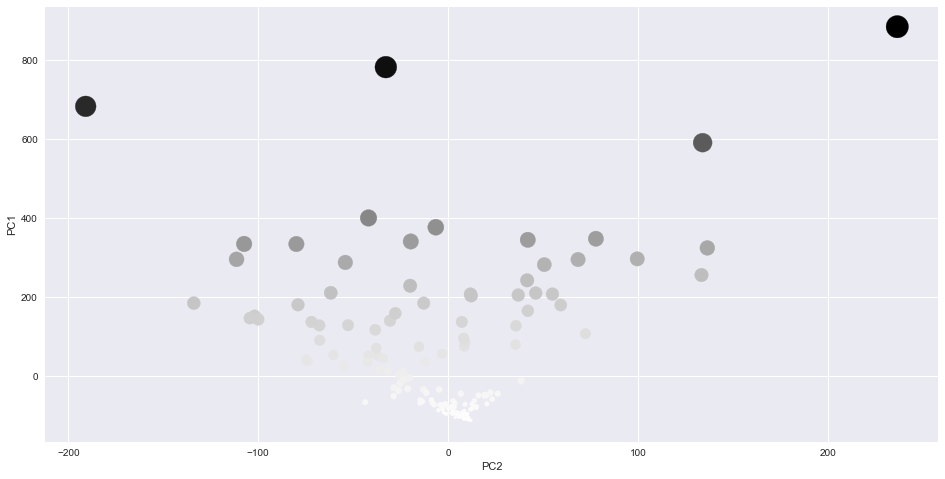

In [51]:
pcaDf.plot(kind = "scatter", x = "PC2", y = "PC1", \
              s = pcaDf["CountryMeanScaled"] * 500, \
              figsize = (16, 8), c = pcaDf["CountryMeanScaled"])

The analysis suggests that most of the variation occurs along the y axis (PC1). The bottom of the chart has a concentration of countries that are mostly developed. When ascending the axis, the number of countries is becoming more sparse. Those countries are less developed.

PCA told us how the data varies but we still don't know the relationship between countries. Let's use K means clustering to group the countries based on their similarity.

When using K means, the most important thing to do is to determine the right number of clusters for the dataset. 

### Silhouette Score:
The Silhouette Score refers to a method of interpretation and validation of consistency within the clusters of data. The technique provides a succinct graphical representation of how well each object lies within its clusters. The Silhoette Coefficient is calculated using the mean intra cluster distance and the mean nearest cluster distance for each sample. It tells us the optimum number of clusters for a given dataset.

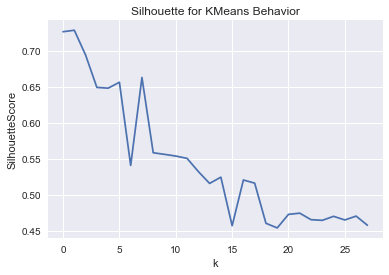

In [52]:
s = []
for n in range(2, 30):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(pcaDf)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(pcaDf, labels, metric = "euclidean"))
    
plt.plot(s)
plt.ylabel("SilhouetteScore")
plt.xlabel("k")
plt.title("Silhouette for KMeans Behavior")
sns.despine()

Silhouette Scores range from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to its neighboring clusters. So let's choose the optimum value of 3 clusters.

In [53]:
km = KMeans(n_clusters = 3)
clusters = km.fit(tb)

In [54]:
clusters.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2])

Store the labels in a column

In [55]:
pcaDf["Cluster"] = pd.Series(clusters.labels_, index = pcaDf.index)
pcaDf.head(10)

,PC1,PC2,CountryMean,CountryMeanScaled,Cluster
Country,,,,,
Afghanistan,51.817943,-41.930763,41.388889,0.186297,0
Albania,-99.541156,8.694757,4.166667,0.018755,0
Algeria,-108.470846,11.361761,2.000000,0.009002,0
American Samoa,-110.172725,8.275184,1.722222,0.007752,0
Andorra,-105.472595,8.233806,2.833333,0.012753,0
Angola,90.038593,-67.670135,51.055556,0.229807,1
Anguilla,-100.119905,9.949590,4.000000,0.018005,0
Antigua and Barbuda,-111.968147,10.776098,1.222222,0.005501,0
Argentina,-92.519727,4.301302,6.000000,0.027007,0


Let's replot with cluster coloring. 

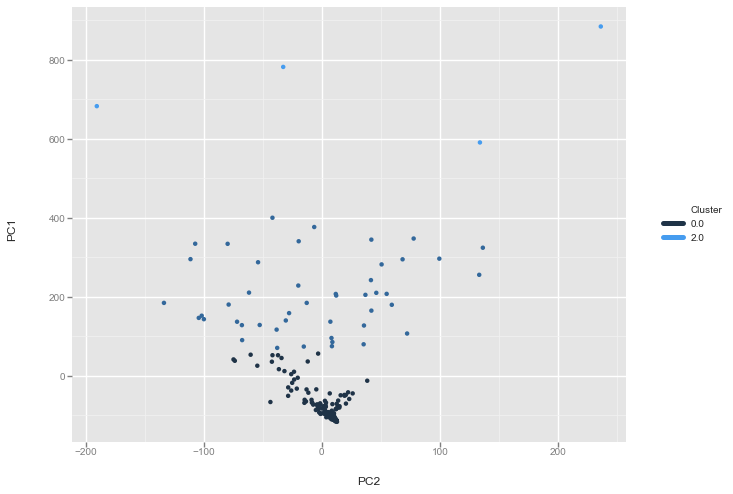

<ggplot: (-9223371915628322416)>

In [58]:
ggplot(pcaDf, aes(x = "PC2", y = "PC1", color = "Cluster")) + geom_point()

In [60]:
tab = pcaDf.groupby(["Cluster"]).size()
tab

Cluster
0    157
1     46
2      4
dtype: int64

## Let's try 4 clusters

In [61]:
km = KMeans(n_clusters = 4)
clusters = km.fit(tb)

In [62]:
pcaDf2 = pcaDf.copy()

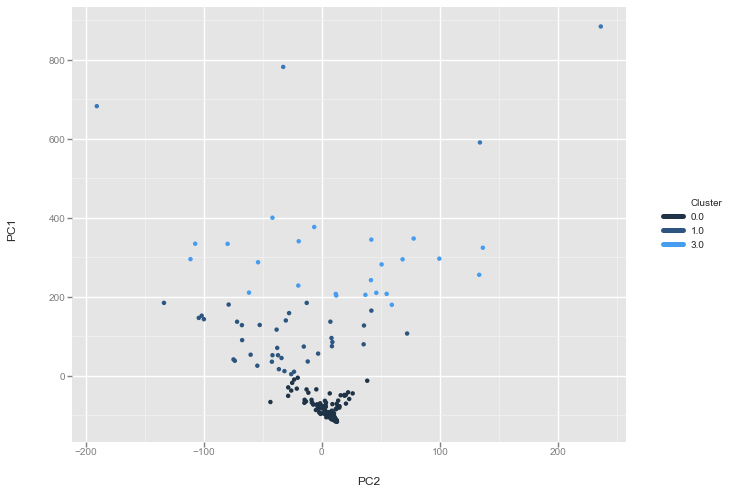

<ggplot: (121226800595)>

In [63]:
pcaDf2["Cluster"] = pd.Series(clusters.labels_, index = pcaDf2.index)
ggplot(pcaDf2, aes(x = "PC2", y = "PC1", color = "Cluster")) + geom_point()

In [64]:
tab = pcaDf2.groupby(["Cluster"]).size()
tab

Cluster
0    143
1     37
2      4
3     23
dtype: int64

## Let's try 5 clusters

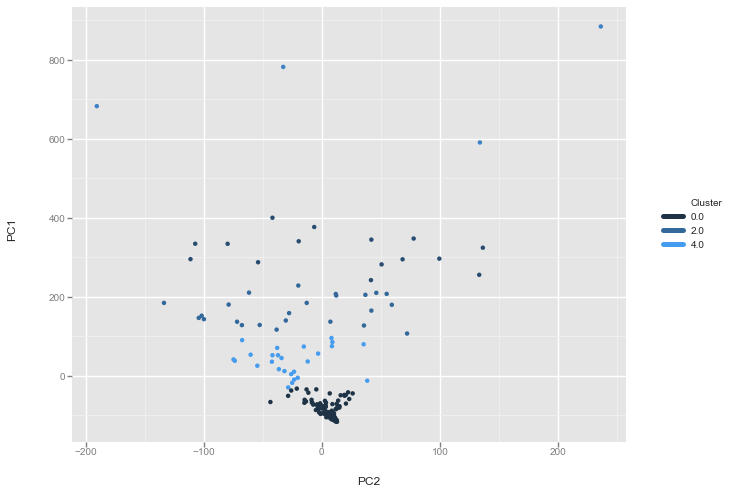

<ggplot: (-9223371915627933275)>

In [66]:
km = KMeans(n_clusters = 5)
clusters = km.fit(tb)
centroids = km.cluster_centers_

pcaDf3 = pcaDf2.copy()

pcaDf3["Cluster"] = pd.Series(clusters.labels_, index = pcaDf3.index)
ggplot(pcaDf3, aes(x = "PC2", y = "PC1", color = "Cluster")) + geom_point()

In [67]:
tab = pcaDf3.groupby(["Cluster"]).size()
tab

Cluster
0    138
1     15
2     24
3      4
4     26
dtype: int64

## Interpreting the cluster results

### Cluster 1

In [69]:
centroids[0]

array([ 6.86956522,  6.94927536,  6.7173913 ,  6.7826087 ,  6.55072464,
        6.91304348,  6.23188406,  6.50724638,  6.39855072,  6.47101449,
        5.68115942,  5.6884058 ,  6.4057971 ,  5.50724638,  5.49275362,
        5.1884058 ,  5.22463768,  4.97101449])

In [70]:
print(pcaDf3.loc[pcaDf3["Cluster"] == 0].shape)

(138, 5)


In [72]:
pcaDf3[pcaDf3["Cluster"] == 0].index.tolist()

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'M

### Cluster 2

In [73]:
centroids[1]

array([  68.66666667,   75.8       ,   80.53333333,   85.6       ,
         90.06666667,   94.13333333,   84.4       ,   85.8       ,
         92.6       ,  107.        ,  104.66666667,  109.66666667,
        116.6       ,  121.13333333,  123.2       ,  124.13333333,
        121.2       ,  129.13333333])

In [74]:
print(pcaDf3.loc[pcaDf3["Cluster"] == 1].shape)

(15, 5)


In [75]:
pcaDf3[pcaDf3["Cluster"] == 1].index.tolist()

['Botswana',
 'Burundi',
 'Cambodia',
 'Central African Republic',
 "Cote d'Ivoire",
 'Korea, Dem. Rep.',
 'Djibouti',
 'Lesotho',
 'Malawi',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Sierra Leone',
 'Togo',
 'Uganda']

### Cluster 3

In [76]:
pcaDf3[pcaDf3["Cluster"] == 2].index.tolist()

['Bangladesh',
 'Bhutan',
 'Burkina Faso',
 'Chad',
 'Congo, Rep.',
 'Congo, Dem. Rep.',
 'Equatorial Guinea',
 'Ethiopia',
 'Gabon',
 'Ghana',
 'Haiti',
 'Indonesia',
 'Kenya',
 'Kiribati',
 'Liberia',
 'Mali',
 'Mauritania',
 'Nigeria',
 'Papua New Guinea',
 'Philippines',
 'Somalia',
 'Sudan',
 'Timor-Leste',
 'Tanzania']

### Cluster 4

In [77]:
pcaDf3[pcaDf3["Cluster"] == 3].index.tolist()

['South Africa', 'Swaziland', 'Zambia', 'Zimbabwe']

### Cluster 5

In [78]:
pcaDf3[pcaDf3["Cluster"] == 4].index.tolist()

['Afghanistan',
 'Angola',
 'Bolivia',
 'Cameroon',
 'Cape Verde',
 'Ecuador',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'India',
 'Laos',
 'Madagascar',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Niger',
 'Pakistan',
 'Peru',
 'Sao Tome and Principe',
 'Senegal',
 'Solomon Islands',
 'Tajikistan',
 'Thailand',
 'Tuvalu',
 'Viet Nam']